# Purpose

Overlay 2 images in one plot, with the top image having selected regions of transparency.

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


# Background image

In [46]:
n_x, n_y = 500, 400

background = np.zeros((n_y, n_x))
background[:, 50:] = np.linspace(0, 0.5, 450)
temp = np.linspace(0, 0.5, 400)
# print(temp)
for i in range(0, n_x):
    background[:, i] += temp
background[100:150, 200:350] = 0
    
background.shape

(400, 500)

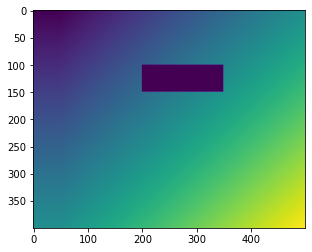

In [47]:
fig, ax = plt.subplots()
ax.imshow(background)

# Foreground image overlaid on background image

In [48]:
foreground = np.zeros((n_y, n_x, 4)) + 0.8
foreground[:, :, 3] = 0
foreground[50:150, 50:150, 3] = 1
foreground[220:280, 350:470, 3] = 1
foreground.shape

(400, 500, 4)

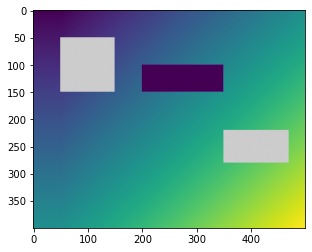

In [49]:
fig, ax = plt.subplots()
ax.imshow(background)
ax.imshow(foreground);

# Foreground image only where background image = 0

## Simple example - 1 region of zeros

### Background image

(400, 500)


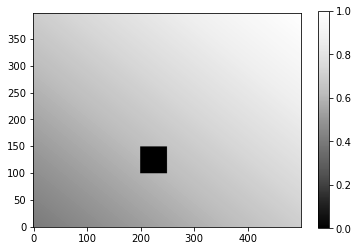

In [200]:
n_x, n_y = 500, 400

background = np.zeros((n_y, n_x))
background[:, :] = np.linspace(0.2, 0.5, 500)
temp = np.linspace(0.2, 0.5, 400)
# print(temp)
for i in range(0, n_x):
    background[:, i] += temp
background[100:150, 200:250] = 0

print(background.shape)

fig, ax = plt.subplots()
im = ax.imshow(background, origin='lower', cmap='Greys_r') #, vmin=0, vmax=1)
fig.colorbar(im);

### Foreground image and plot on top of background

2 2500 2500


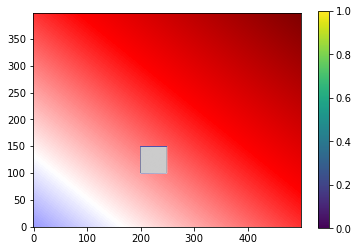

In [201]:
foreground = np.zeros((n_y, n_x, 4))

temp = np.where(background == 0)
print(len(temp), len(temp[0]), len(temp[1]))
# temp

# indices = [[y, x] for y, x in zip(temp[0], temp[1])]
grey_value = 0.8
foreground[np.ix_(*temp)] = [grey_value, grey_value, grey_value, 1]
# foreground[np.ix_(temp[0], temp[1])] = [grey_value, grey_value, grey_value, 1]

fig, ax = plt.subplots()
ax.imshow(background, origin='lower', cmap="seismic")
im = ax.imshow(foreground, origin='lower')
fig.colorbar(im);

## Another example

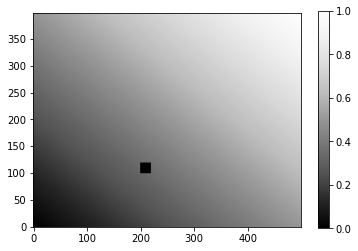

In [205]:
n_x, n_y = 500, 400

background = np.zeros((n_y, n_x))
background[:, :] = np.linspace(0, 0.5, 500)
temp = np.linspace(0, 0.5, 400)
# print(temp)
for i in range(0, n_x):
    background[:, i] += temp
background[100:120, 200:220] = 0
    
fig, ax = plt.subplots()
im = ax.imshow(background, origin='lower', cmap='Greys_r') #, vmin=0, vmax=1)
fig.colorbar(im);

2 4480 4480


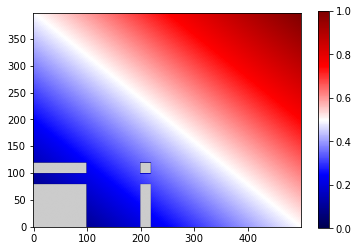

In [206]:
foreground = np.zeros((n_y, n_x, 4))

temp = np.where(background < 1e-1)
print(len(temp), len(temp[0]), len(temp[1]))
# temp

# indices = [[y, x] for y, x in zip(temp[0], temp[1])]
grey_value = 0.8
foreground[np.ix_(*temp)] = [grey_value, grey_value, grey_value, 1]
# foreground[np.ix_(temp[0], temp[1])] = [grey_value, grey_value, grey_value, 1]

fig, ax = plt.subplots()
im = ax.imshow(background, origin='lower', cmap="seismic")
ax.imshow(foreground, origin='lower');
fig.colorbar(im);